In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [353]:
data = pd.read_csv('2019-2023FILTERED.csv').drop(columns='Unnamed: 0')
data

,QUOTE DATE,SPY_LAST,EXPIRY_DATE,DTE,DELTA,GAMMA,VEGA,THETA,RHO,IV,STRIKE,PRICE
0,2019-02-01,270.09,2019-02-15,14.00,0.94724,0.00446,0.05818,-0.08284,0.09057,0.43571,235.0,35.635
1,2019-02-01,270.09,2019-02-15,14.00,0.94585,0.00526,0.06066,-0.07592,0.09169,0.38645,239.0,31.595
2,2019-02-01,270.09,2019-02-15,14.00,0.94846,0.00549,0.05780,-0.06657,0.09268,0.35390,241.0,29.525
3,2019-02-01,270.09,2019-02-15,14.00,0.94519,0.00591,0.06098,-0.06821,0.09345,0.34610,242.0,28.550
4,2019-02-01,270.09,2019-02-15,14.00,0.94444,0.00602,0.06092,-0.06781,0.09333,0.34077,242.5,28.040
...,...,...,...,...,...,...,...,...,...,...,...,...
3068296,2023-09-29,427.40,2026-01-16,840.04,0.07042,0.00144,0.86825,-0.00940,0.63235,0.14631,650.0,2.720
3068297,2023-09-29,427.40,2026-01-16,840.04,0.06119,0.00127,0.77874,-0.00860,0.55181,0.14253,655.0,2.260
3068298,2023-09-29,427.40,2026-01-16,840.04,0.06441,0.00129,0.81537,-0.00880,0.58199,0.14837,660.0,2.505
3068299,2023-09-29,427.40,2026-01-16,840.04,0.06327,0.00129,0.80731,-0.00938,0.57389,0.15127,665.0,2.505


In [355]:
data.isna().sum()

QUOTE DATE     0
SPY_LAST       0
EXPIRY_DATE    0
DTE            0
DELTA          0
GAMMA          0
VEGA           0
THETA          0
RHO            0
IV             0
STRIKE         0
PRICE          0
dtype: int64

In [271]:
import pandas as pd
from pandas_market_calendars import get_calendar

# Specify the start and end dates
start_date = '2019-02-01'
end_date = '2023-09-29'

# Get the NYSE calendar
nyse = get_calendar('XNYS')

# Get the trading days between the specified dates
trading_days = nyse.valid_days(pd.Timestamp(start_date), pd.Timestamp(end_date))

tDays = []
for day in trading_days:
    year = str(day.year)
    if day.month < 10:
        month = '0' + str(day.month)
    else:
        month = str(day.month)

    if day.day < 10:
        day = '0' + str(day.day)
    else:
        day = str(day.day)
    dayString = year + '-' + month + '-' + day
    tDays.append(dayString)

front = tDays[:852]
back = tDays[852:]
tDays = front
tDays.append('2022-06-20')
for date in back:
    tDays.append(date)
len(tDays), tDays

(1175,
 ['2019-02-01',
  '2019-02-04',
  '2019-02-05',
  '2019-02-06',
  '2019-02-07',
  '2019-02-08',
  '2019-02-11',
  '2019-02-12',
  '2019-02-13',
  '2019-02-14',
  '2019-02-15',
  '2019-02-19',
  '2019-02-20',
  '2019-02-21',
  '2019-02-22',
  '2019-02-25',
  '2019-02-26',
  '2019-02-27',
  '2019-02-28',
  '2019-03-01',
  '2019-03-04',
  '2019-03-05',
  '2019-03-06',
  '2019-03-07',
  '2019-03-08',
  '2019-03-11',
  '2019-03-12',
  '2019-03-13',
  '2019-03-14',
  '2019-03-15',
  '2019-03-18',
  '2019-03-19',
  '2019-03-20',
  '2019-03-21',
  '2019-03-22',
  '2019-03-25',
  '2019-03-26',
  '2019-03-27',
  '2019-03-28',
  '2019-03-29',
  '2019-04-01',
  '2019-04-02',
  '2019-04-03',
  '2019-04-04',
  '2019-04-05',
  '2019-04-08',
  '2019-04-09',
  '2019-04-10',
  '2019-04-11',
  '2019-04-12',
  '2019-04-15',
  '2019-04-16',
  '2019-04-17',
  '2019-04-18',
  '2019-04-22',
  '2019-04-23',
  '2019-04-24',
  '2019-04-25',
  '2019-04-26',
  '2019-04-29',
  '2019-04-30',
  '2019-05-01',
 

In [272]:
d2i = pd.DataFrame()
d2i['index'] = range(0, 1175)
d2i.index = tDays
d2i[:20]

,index
2019-02-01,0
2019-02-04,1
2019-02-05,2
2019-02-06,3
2019-02-07,4
2019-02-08,5
2019-02-11,6
2019-02-12,7
2019-02-13,8
2019-02-14,9


In [273]:
i2d = pd.DataFrame()
i2d['day'] = tDays
i2d

,day
0,2019-02-01
1,2019-02-04
2,2019-02-05
3,2019-02-06
4,2019-02-07
...,...
1170,2023-09-25
1171,2023-09-26
1172,2023-09-27
1173,2023-09-28


In [4]:
data['EXPIRY_DATE'].nunique()

802

In [46]:
full_data = {}
count = 0
for row in range(len(data)):
    cur_data = []
    exp_str = str(data.loc[row]['EXPIRY_DATE'])[1:]
    strike = float(data.loc[row]['STRIKE'])
    rowData = data.iloc[row]
    if exp_str not in full_data.keys():
        print(exp_str)
        print(count)
        count += 1
        full_data[exp_str] = {}        
    if strike not in full_data[exp_str].keys():
        full_data[exp_str][strike] = []
    
    full_data[exp_str][strike].append(rowData)

2019-02-15
0
2019-02-19
1
2019-02-20
2
2019-02-22
3
2019-02-25
4
2019-02-27
5
2019-03-01
6
2019-03-04
7
2019-03-06
8
2019-03-08
9
2019-03-11
10
2019-03-15
11
2019-03-22
12
2019-03-29
13
2019-04-18
14
2019-05-17
15
2019-06-21
16
2019-06-28
17
2019-09-20
18
2019-09-30
19
2019-12-20
20
2019-12-31
21
2020-01-17
22
2020-03-20
23
2020-06-19
24
2020-09-18
25
2020-12-18
26
2021-01-15
27
2021-12-17
28
2019-03-13
29
2019-03-18
30
2019-03-20
31
2019-03-25
32
2019-03-27
33
2019-04-05
34
2021-03-19
35
2019-04-01
36
2019-04-03
37
2019-04-12
38
2019-04-08
39
2019-07-19
40
2019-04-10
41
2019-04-26
42
2019-04-15
43
2019-04-17
44
2019-04-22
45
2019-04-24
46
2019-05-03
47
2019-04-29
48
2019-05-01
49
2019-05-10
50
2019-08-16
51
2019-05-06
52
2020-03-31
53
2019-05-08
54
2019-05-24
55
2019-05-13
56
2019-05-15
57
2019-05-31
58
2019-05-20
59
2019-05-22
60
2019-05-28
61
2019-05-29
62
2019-06-07
63
2019-06-03
64
2019-06-05
65
2019-06-14
66
2019-06-10
67
2019-06-12
68
2021-06-18
69
2019-06-17
70
2019-06-19
71
20

In [47]:
full_data['2019-02-19']

{203.0: [QUOTE DATE      2019-02-01
  SPY_LAST            270.09
  EXPIRY_DATE     2019-02-19
  DTE                   18.0
  DELTA              0.92523
  GAMMA              0.00042
  VEGA               0.07084
  THETA             -0.14149
  RHO                5.98248
  IV                 0.76374
  STRIKE               203.0
  PRICE                67.36
  Name: 65, dtype: object,
  QUOTE DATE      2019-02-05
  SPY_LAST            273.17
  EXPIRY_DATE     2019-02-19
  DTE                   14.0
  DELTA              0.92937
  GAMMA              0.00042
  VEGA               0.05859
  THETA              -0.0901
  RHO                 0.0096
  IV                 0.88255
  STRIKE               203.0
  PRICE               70.265
  Name: 4392, dtype: object],
 204.0: [QUOTE DATE      2019-02-01
  SPY_LAST            270.09
  EXPIRY_DATE     2019-02-19
  DTE                   18.0
  DELTA              0.92552
  GAMMA              0.00052
  VEGA               0.07051
  THETA             -0.14057
 

In [52]:
for exp in full_data.keys():
    for strike in full_data[exp]:
        print(len(full_data[exp][strike]), exp, strike)

1 2019-02-15 235.0
1 2019-02-15 239.0
1 2019-02-15 241.0
1 2019-02-15 242.0
1 2019-02-15 242.5
1 2019-02-15 243.0
1 2019-02-15 243.5
1 2019-02-15 244.0
1 2019-02-15 244.5
1 2019-02-15 245.0
1 2019-02-15 245.5
1 2019-02-15 246.0
1 2019-02-15 246.5
1 2019-02-15 247.0
1 2019-02-15 247.5
1 2019-02-15 248.0
1 2019-02-15 248.5
1 2019-02-15 249.0
1 2019-02-15 249.5
1 2019-02-15 250.0
1 2019-02-15 250.5
1 2019-02-15 251.0
1 2019-02-15 251.5
1 2019-02-15 252.0
1 2019-02-15 252.5
1 2019-02-15 253.0
1 2019-02-15 253.5
1 2019-02-15 254.0
1 2019-02-15 254.5
1 2019-02-15 255.0
1 2019-02-15 255.5
1 2019-02-15 256.0
1 2019-02-15 256.5
1 2019-02-15 257.0
1 2019-02-15 257.5
1 2019-02-15 258.0
1 2019-02-15 258.5
1 2019-02-15 259.0
1 2019-02-15 259.5
1 2019-02-15 260.0
1 2019-02-15 261.0
1 2019-02-15 262.0
1 2019-02-15 262.5
1 2019-02-15 263.0
1 2019-02-15 264.0
1 2019-02-15 265.0
1 2019-02-15 266.0
1 2019-02-15 267.0
1 2019-02-15 267.5
1 2019-02-15 268.0
1 2019-02-15 269.0
1 2019-02-15 270.0
1 2019-02-15

In [65]:
import pickle

In [67]:
with open('optDict.pkl', 'wb') as file:
    pickle.dump(full_data, file)

KeyboardInterrupt: 

In [ ]:
with open('optDict.pkl', 'rb') as file:
    d = pickle.load(file)
d['2019-12-20'][242.0]

In [214]:
full_data['2019-12-20'][242.0][0]['QUOTE DATE']

' 2019-02-01'

In [89]:
exPrices = full_data['2019-12-20'][242.0]
p = []
u = []
iv = []
for item in exPrices:
    p.append(item['PRICE'])
    u.append(item['SPY_LAST'])
    iv.append(item['IV'])
ex = pd.DataFrame()
ex['price'] = p
ex['underlying'] = u
ex['iv'] = iv
ex

,price,underlying,iv
0,37.205,270.09,0.23547
1,38.335,272.02,0.23429
2,39.285,273.17,0.23667
3,38.770,272.72,0.23375
4,36.675,270.22,0.23140
...,...,...,...
206,69.790,311.66,0.67022
207,67.690,309.51,0.69111
208,69.615,311.50,0.71837
209,70.140,312.09,0.73184


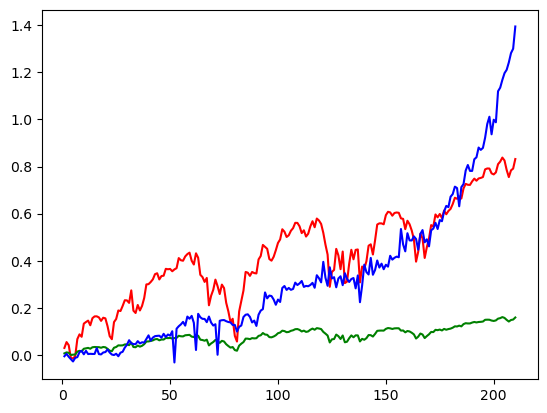

In [68]:
plt.plot(ex['price'].pct_change().cumsum(), color='red')
plt.plot(ex['underlying'].pct_change().cumsum(), color='g')
plt.plot(ex['iv'].pct_change().cumsum(), color='blue')
plt.show()

In [95]:
from datetime import datetime as dt
import datetime

In [176]:
d2i.loc['2019-02-19'].iloc[0]

11

In [219]:
full_data.keys()

dict_keys(['2019-02-15', '2019-02-19', '2019-02-20', '2019-02-22', '2019-02-25', '2019-02-27', '2019-03-01', '2019-03-04', '2019-03-06', '2019-03-08', '2019-03-11', '2019-03-15', '2019-03-22', '2019-03-29', '2019-04-18', '2019-05-17', '2019-06-21', '2019-06-28', '2019-09-20', '2019-09-30', '2019-12-20', '2019-12-31', '2020-01-17', '2020-03-20', '2020-06-19', '2020-09-18', '2020-12-18', '2021-01-15', '2021-12-17', '2019-03-13', '2019-03-18', '2019-03-20', '2019-03-25', '2019-03-27', '2019-04-05', '2021-03-19', '2019-04-01', '2019-04-03', '2019-04-12', '2019-04-08', '2019-07-19', '2019-04-10', '2019-04-26', '2019-04-15', '2019-04-17', '2019-04-22', '2019-04-24', '2019-05-03', '2019-04-29', '2019-05-01', '2019-05-10', '2019-08-16', '2019-05-06', '2020-03-31', '2019-05-08', '2019-05-24', '2019-05-13', '2019-05-15', '2019-05-31', '2019-05-20', '2019-05-22', '2019-05-28', '2019-05-29', '2019-06-07', '2019-06-03', '2019-06-05', '2019-06-14', '2019-06-10', '2019-06-12', '2021-06-18', '2019-06-

In [236]:
if '2019-03-04' in d2i.index:
    print('here')

here


In [235]:
full_data['2019-03-04'][269.0]

[QUOTE DATE      2019-02-01
 SPY_LAST            270.09
 EXPIRY_DATE     2019-03-04
 DTE                   31.0
 DELTA              0.54605
 GAMMA              0.03415
 VEGA               0.31718
 THETA             -0.07269
 RHO                0.12515
 IV                 0.14533
 STRIKE               269.0
 PRICE                 5.18
 Name: 466, dtype: object,
 QUOTE DATE      2019-02-04
 SPY_LAST            272.02
 EXPIRY_DATE     2019-03-04
 DTE                   28.0
 DELTA               0.6099
 GAMMA              0.03522
 VEGA               0.29331
 THETA             -0.06917
 RHO                  0.119
 IV                 0.14306
 STRIKE               269.0
 PRICE                5.915
 Name: 2649, dtype: object,
 QUOTE DATE      2019-02-05
 SPY_LAST            273.17
 EXPIRY_DATE     2019-03-04
 DTE                   27.0
 DELTA              0.64347
 GAMMA              0.03325
 VEGA               0.28113
 THETA             -0.07037
 RHO                0.11788
 IV                 0

In [227]:
d = dt.strptime('2019-03-04', '%Y-%m-%d')
d2 = str((d + datetime.timedelta(days=-14)).date())
d2i.loc[d2]

KeyError: '2019-02-18'

In [270]:
d2i[850:]

,index
2022-06-16,850
2022-06-17,851
2019-06-20,852
2022-06-21,853
2022-06-22,854
...,...
2023-09-25,1170
2023-09-26,1171
2023-09-27,1172
2023-09-28,1173


In [274]:
d2i.loc['2022-06-20']

index    852
Name: 2022-06-20, dtype: int64

In [239]:
import warnings
warnings.filterwarnings("ignore")

In [409]:
newDataIV = {}
count = 1
total = 0
nacount = 0
for exp in full_data.keys():
    expData = pd.DataFrame()
    startStr = ((full_data[exp][list(full_data[exp].keys())[0]])[0]['QUOTE DATE'])[1:]
    exp2 = dt.strptime(exp, '%Y-%m-%d')
    end1 = str((exp2 + datetime.timedelta(days=-14)).date())
    end2 = str((exp2 + datetime.timedelta(days=-15)).date())
    end3 = str((exp2 + datetime.timedelta(days=-16)).date())
    startIndex = int(d2i.loc[startStr].iloc[0])
    if end1 in d2i.index:
        endIndex = int(d2i.loc[end1].iloc[0]) + 1
    elif end2 in d2i.index:
        endIndex = int(d2i.loc[end2].iloc[0]) + 1
        print('end2')
    elif end3 in d2i.index:
        endIndex = int(d2i.loc[end3].iloc[0]) + 1
        print('end3')
    days = (endIndex - startIndex)
    print(count)
    count += 1
    print(exp)
    daysIndex = list(i2d[startIndex:endIndex]['day'])
    #print(daysIndex)
    for strike in full_data[exp]:
        sIV = pd.DataFrame()
        sIV.index = daysIndex
        for row in full_data[exp][strike]:
            #sIV.append(row['IV'])
            date = row['QUOTE DATE'][1:]
            #print(date)
            iv = row['IV']
            sIV.loc[date, strike] = iv
            #print(row)
        expData[strike] = sIV
    newDataIV[exp] = expData
    nacount += expData.isna().sum().sum()
    total += expData.shape[0] * expData.shape[1]
    print(f'N/A Count: {nacount} | Total: {total}')
    print('-------------------------')
    #print(expData)
    #print(expData)

1
2019-02-15
N/A Count: 0 | Total: 65
-------------------------
2
2019-02-19
N/A Count: 40 | Total: 338
-------------------------
3
2019-02-20
N/A Count: 65 | Total: 566
-------------------------
4
2019-02-22
N/A Count: 161 | Total: 1148
-------------------------
5
2019-02-25
N/A Count: 227 | Total: 1561
-------------------------
6
2019-02-27
N/A Count: 331 | Total: 2146
-------------------------
7
2019-03-01
N/A Count: 509 | Total: 3323
-------------------------
8
2019-03-04
N/A Count: 567 | Total: 3873
-------------------------
9
2019-03-06
N/A Count: 639 | Total: 4523
-------------------------
10
2019-03-08
N/A Count: 741 | Total: 5498
-------------------------
11
2019-03-11
N/A Count: 887 | Total: 6218
-------------------------
12
2019-03-15
N/A Count: 1412 | Total: 9518
-------------------------
13
2019-03-22
N/A Count: 1809 | Total: 11243
-------------------------
14
2019-03-29
N/A Count: 2572 | Total: 14693
-------------------------
15
2019-04-18
N/A Count: 4988 | Total: 21469
-

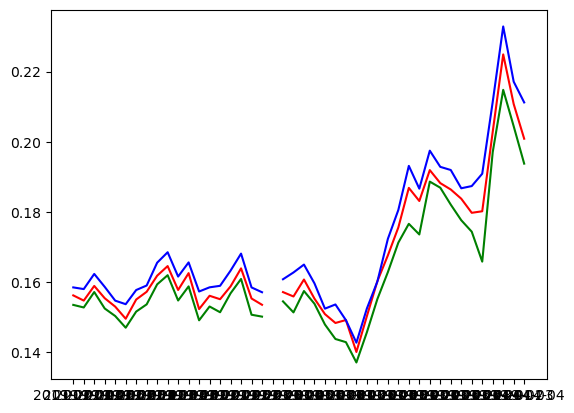

In [410]:
plt.plot(newDataIV['2019-04-18'][271.0], color='r')
plt.plot(newDataIV['2019-04-18'][270.0], color='b')
plt.plot(newDataIV['2019-04-18'][272.0], color='g')
plt.show()

In [321]:
newData.keys()

dict_keys(['2019-02-15', '2019-02-19', '2019-02-20', '2019-02-22', '2019-02-25', '2019-02-27', '2019-03-01', '2019-03-04', '2019-03-06', '2019-03-08', '2019-03-11', '2019-03-15', '2019-03-22', '2019-03-29', '2019-04-18', '2019-05-17', '2019-06-21', '2019-06-28', '2019-09-20', '2019-09-30', '2019-12-20', '2019-12-31', '2020-01-17', '2020-03-20', '2020-06-19', '2020-09-18', '2020-12-18', '2021-01-15', '2021-12-17', '2019-03-13', '2019-03-18', '2019-03-20', '2019-03-25', '2019-03-27', '2019-04-05', '2021-03-19', '2019-04-01', '2019-04-03', '2019-04-12', '2019-04-08', '2019-07-19', '2019-04-10', '2019-04-26', '2019-04-15', '2019-04-17', '2019-04-22', '2019-04-24', '2019-05-03', '2019-04-29', '2019-05-01', '2019-05-10', '2019-08-16', '2019-05-06', '2020-03-31', '2019-05-08', '2019-05-24', '2019-05-13', '2019-05-15', '2019-05-31', '2019-05-20', '2019-05-22', '2019-05-28', '2019-05-29', '2019-06-07', '2019-06-03', '2019-06-05', '2019-06-14', '2019-06-10', '2019-06-12', '2021-06-18', '2019-06-

In [532]:
newDataIV['2023-10-04']

,410,420,430,431,432,433,434,435,436,437,...,441,442,443,444,445,446,447,448,449,450
2023-09-20,0.23275,0.18704,0.15188,0.14923,0.14665,0.14368,0.14162,0.13909,0.13666,0.13396,...,0.12455,0.12181,0.12053,0.11843,0.11739,0.11506,0.1138,0.11224,0.11054,0.10959


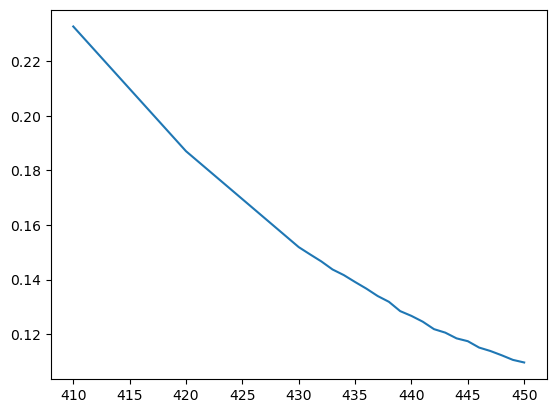

In [535]:
plt.plot(newDataIV['2023-10-04'].loc['2023-09-20'])
plt.show()

In [519]:
surface2

,390,400,410,418,419,420,421,422,423,424,...,430,431,432,433,434,435,436,437,438,440
1,0.29598,0.23507,0.19477,0.13511,0.15223,0.13707,0.14135,0.12902,0.1239,0.12037,...,0.10591,0.1048,0.10357,0.10238,0.10212,0.10207,0.10144,0.10224,0.10189,0.1029


417.0 464.0


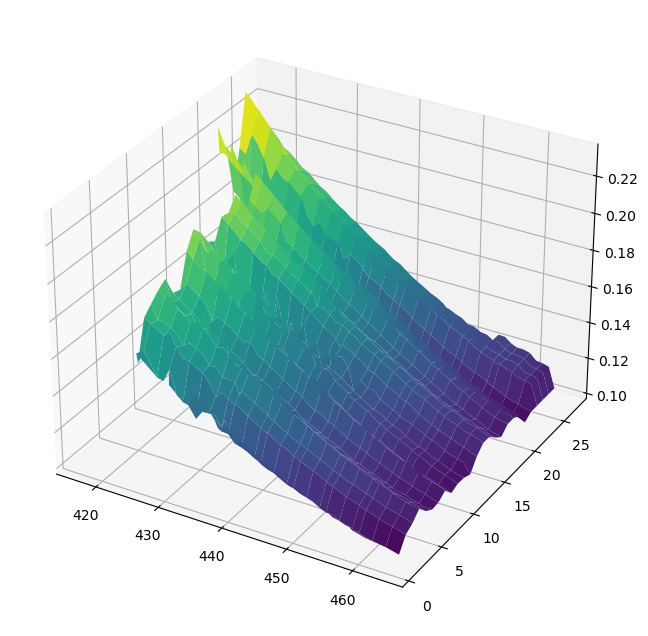

In [522]:
surface = newDataIV['2023-09-01']
surface.index = range(1, (len(surface.index) + 1))
surface2 = surface.interpolate(method='linear', axis=0)
#print(list(surface2.transpose().index))
#surface2 = surface2.transpose()[160.0:295].transpose()

surface2 = surface2.transpose().sort_index().transpose()

strikes = list(surface2.columns)
length = len(strikes)
start = int(0.2 * length)
end = int(0.8 * length)
startI = strikes[start]
endI = strikes[end]
print(startI, endI)

surface2 = surface2.transpose().loc[startI:endI].transpose()

X, Y = np.meshgrid(surface2.columns, surface2.index)
Z = surface2.to_numpy()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

In [382]:
import plotly.graph_objects as go
from plotly.graph_objs import Surface
from plotly.offline import iplot, init_notebook_mode

In [391]:
list(surface2.columns)

[160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 170.0,
 175.0,
 180.0,
 185.0,
 190.0,
 195.0,
 200.0,
 205.0,
 210.0,
 215.0,
 220.0,
 225.0,
 230.0,
 235.0,
 240.0,
 245.0,
 246.0,
 247.0,
 248.0,
 249.0,
 250.0,
 251.0,
 252.0,
 253.0,
 254.0,
 255.0,
 256.0,
 257.0,
 258.0,
 259.0,
 260.0,
 261.0,
 262.0,
 263.0,
 264.0,
 265.0,
 266.0,
 267.0,
 268.0,
 269.0,
 270.0,
 271.0,
 272.0,
 273.0,
 274.0,
 275.0,
 276.0,
 277.0,
 278.0,
 279.0,
 280.0,
 281.0,
 282.0,
 283.0,
 284.0,
 285.0,
 286.0,
 287.0,
 288.0,
 289.0,
 290.0,
 295.0,
 300.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 110.0,
 120.0,
 130.0,
 140.0,
 150.0,
 291.0,
 292.0,
 293.0,
 294.0,
 296.0,
 297.0,
 298.0,
 299.0,
 216.0,
 217.0,
 218.0,
 219.0,
 221.0,
 222.0,
 223.0,
 224.0,
 226.0,
 227.0,
 228.0,
 229.0,
 231.0,
 232.0,
 233.0,
 234.0,
 236.0,
 237.0,
 238.0,
 239.0,
 241.0,
 242.0,
 243.0,
 244.0,
 193.0,
 194.0,
 196.0,
 197.0,
 198.0,
 199.0,
 202.0,
 203.0,
 208.0,
 209.0,
 211.0,
 213.0,
 214.0,
 201.

In [395]:
init_notebook_mode()
fig = go.Figure(data=[go.Mesh3d(x=list(surface2.columns), y=list(surface2.index), z=surface2.values)])
fig.update_layout(height=500, width=500)
fig.show()

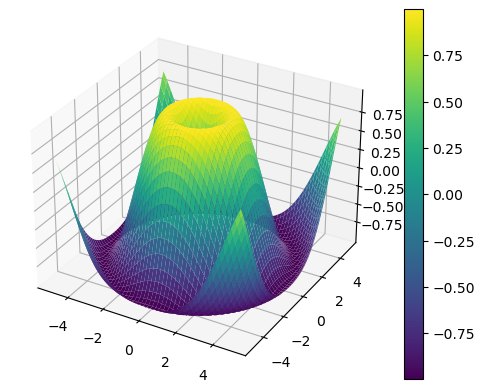

In [397]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for the x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Define the function for the surface
# You can replace this with your own function
z = np.sin(np.sqrt(x**2 + y**2))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x, y, z, cmap='viridis')

# Add a colorbar
fig.colorbar(surface)

# Show the plot
plt.show()
